# ESE 527 Project
## Data-Driven Analytics for Obesity Management and Business Strategy
### Team ZY
### Team members: Zhetan Zhang, Mingqi Yang

## 1. Data preprocessing

### Read and check data set

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/ambition/Desktop/Fall 2023/ESE 527/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### One-hot encoding

In [4]:
df_object = df.select_dtypes(include=[object])
df_numerics = df.select_dtypes(include='number')

In [5]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df_object)
encoded_df = pd.DataFrame(enc.transform(df_object).toarray(),columns=enc.get_feature_names_out())

In [6]:
new_df = pd.concat([df_numerics, encoded_df], axis=1, join="inner")
new_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalization

In [7]:
normalized_df = (new_df-new_df.min())/(new_df.max()-new_df.min())
normalized_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Visualization

Numerical data

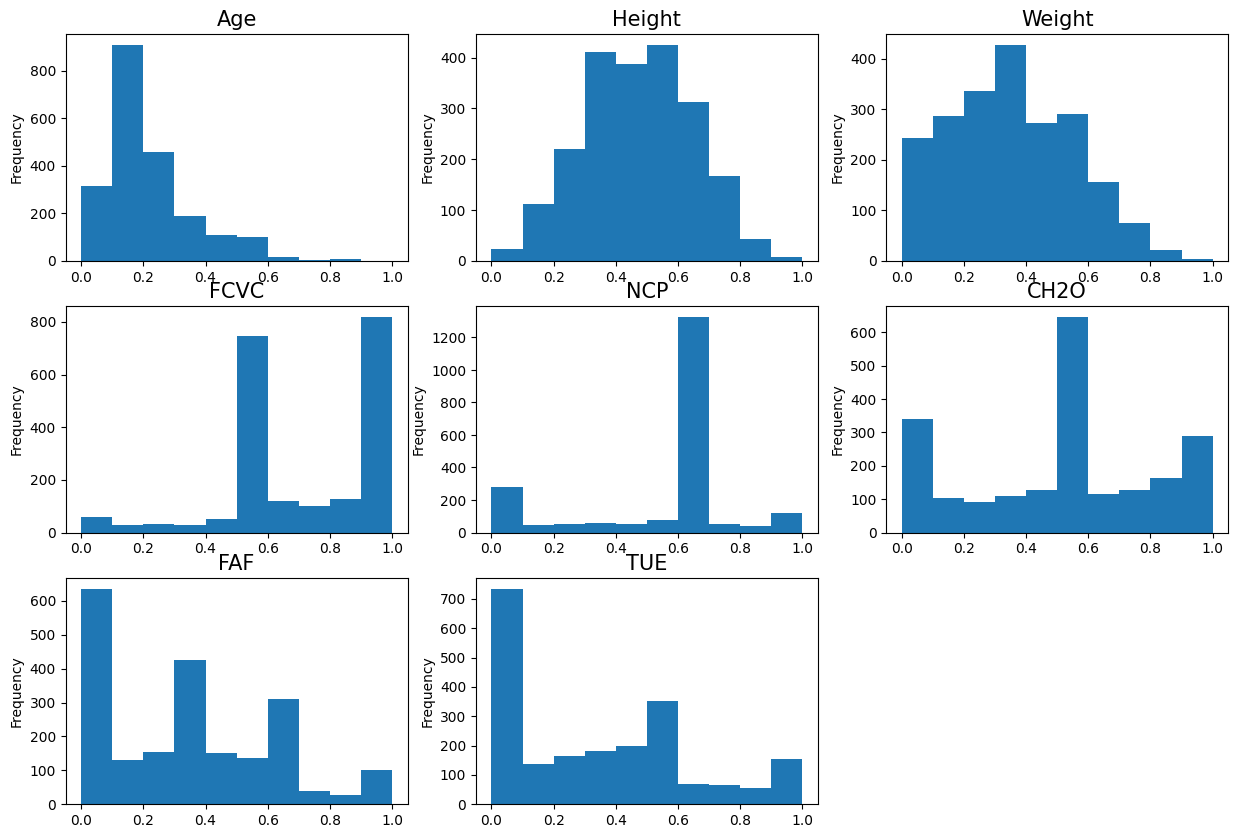

In [8]:
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
normalized_numeric = normalized_df.iloc[:,:8]
#create subplot
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
subplot_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i in range(8):
    normalized_numeric.iloc[:,i].plot(kind = 'hist',ax = subplot_list[i])
    subplot_list[i].set_title(normalized_numeric.columns[i],size = 15)
plt.draw()
plt.show()

<Axes: ylabel='Frequency'>

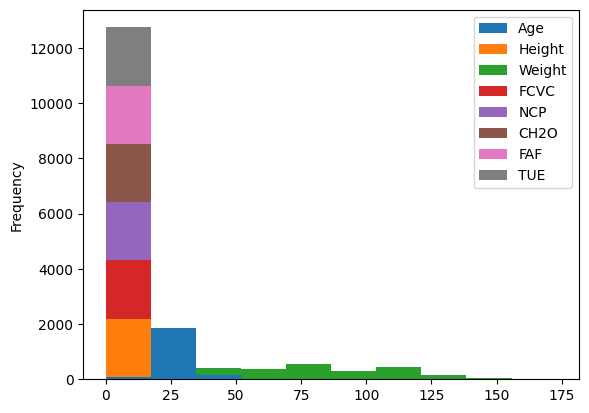

In [9]:
#original data distribution
df_numerics.plot.hist(stacked=True,bins = 10)

<Axes: ylabel='Frequency'>

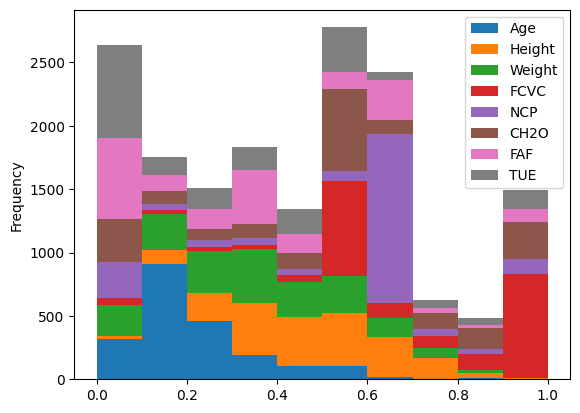

In [10]:
#normalized data distribution
normalized_df.iloc[:,0:8].plot.hist(stacked=True,bins = 10)

Correlation Heat map

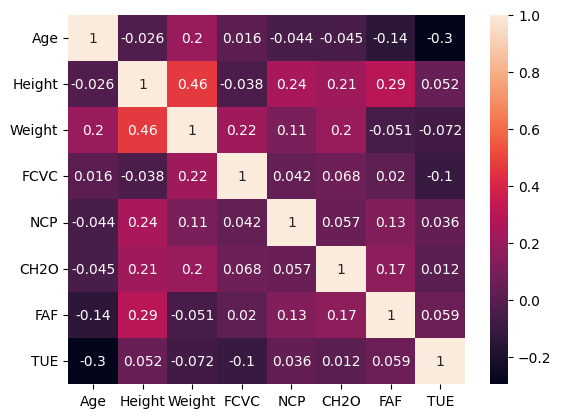

In [11]:
import seaborn as sns
sns.heatmap(normalized_df.iloc[:,0:8].corr(),annot = True);

Categorical data

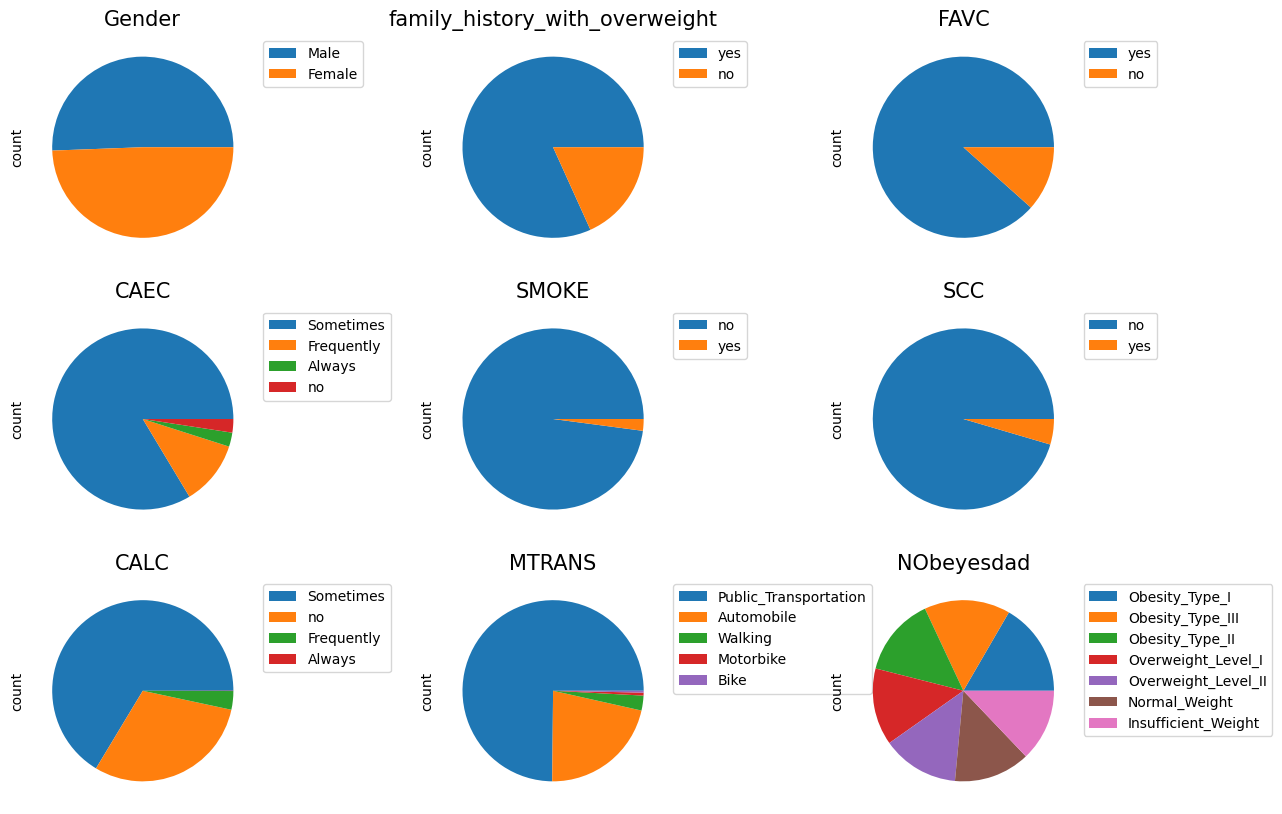

In [12]:
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
#create subplot
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
subplot_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(9):
    df_object.iloc[:,i].value_counts().plot(kind='pie',ax = subplot_list[i],labeldistance=None)
    subplot_list[i].set_title(df_object.columns[i],size = 15)
    subplot_list[i].legend(loc = 'upper left',bbox_to_anchor=(1, 1))
plt.draw()
plt.show()

## 2. Anomaly Detection

### Numerical Data

In [13]:
df_numerics

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


Feature Age:
Number of normal data points: 2087
Number of anomalies: 24
Percentage of anomalies: 1.149976042165788% 



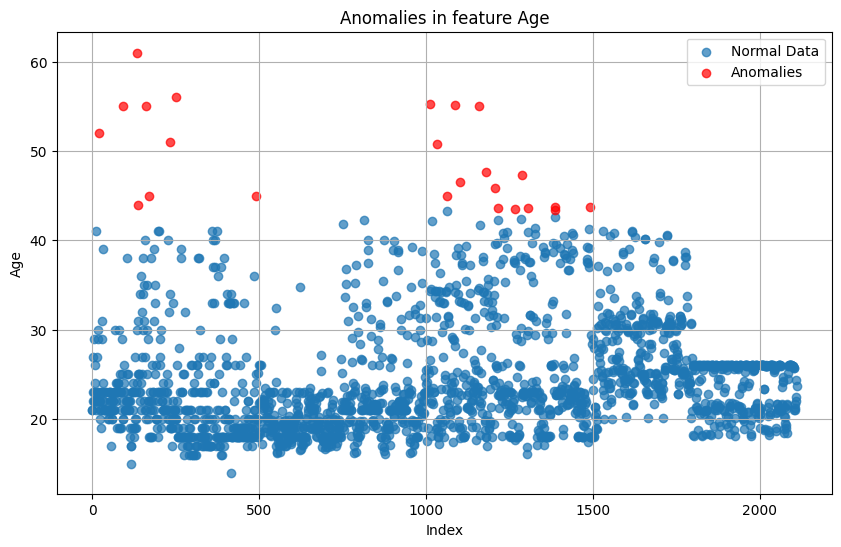

Feature Height:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



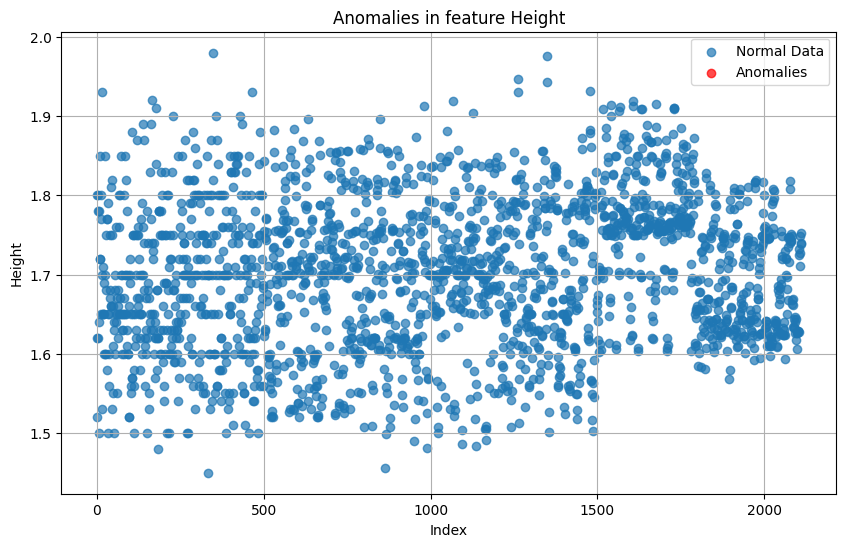

Feature Weight:
Number of normal data points: 2110
Number of anomalies: 1
Percentage of anomalies: 0.047393364928909956% 



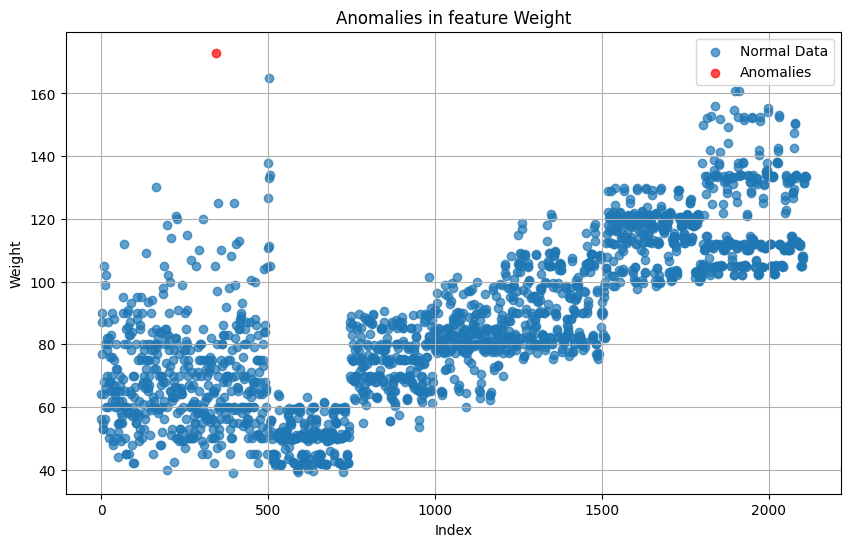

Feature FCVC:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



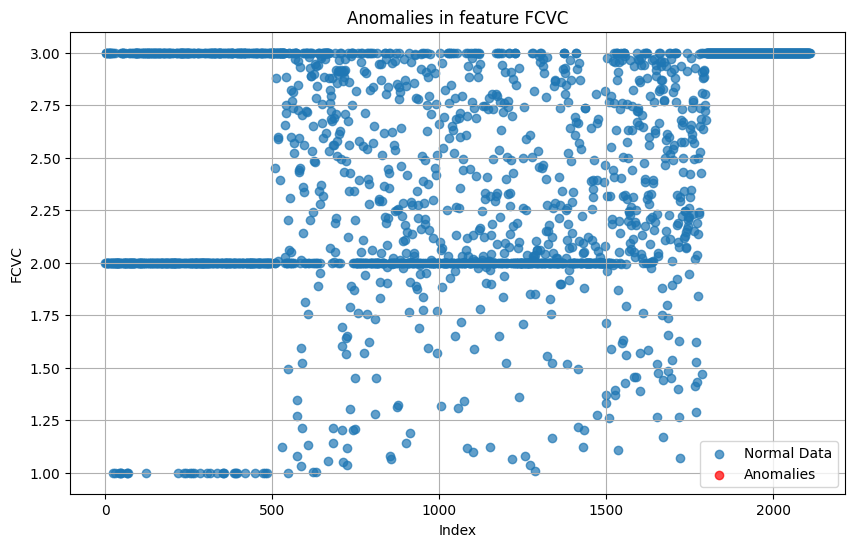

Feature NCP:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



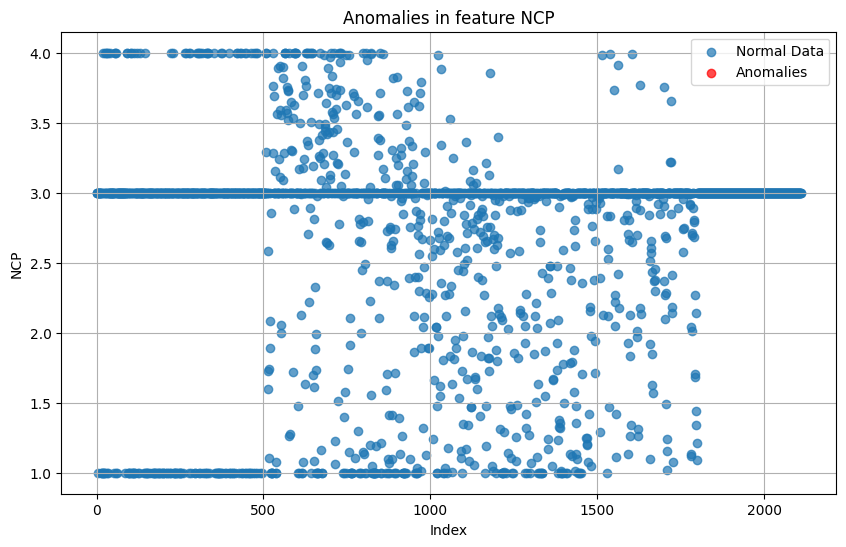

Feature CH2O:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



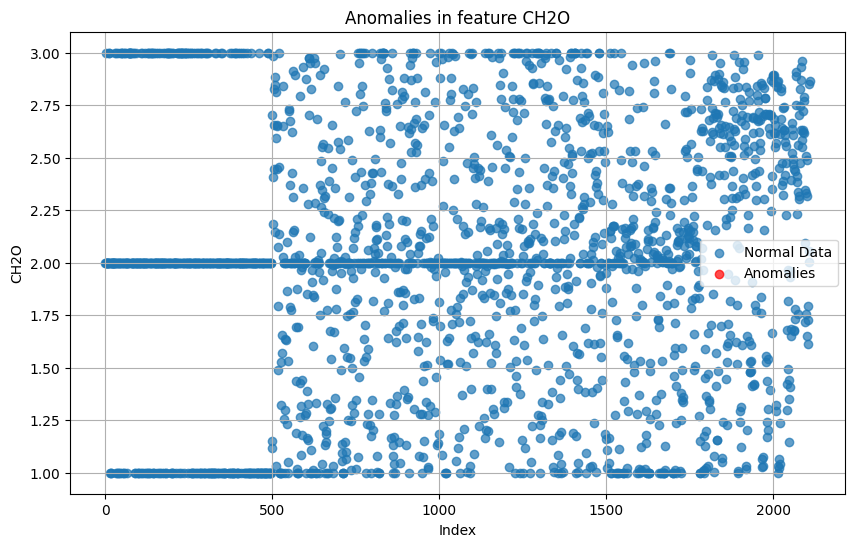

Feature FAF:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



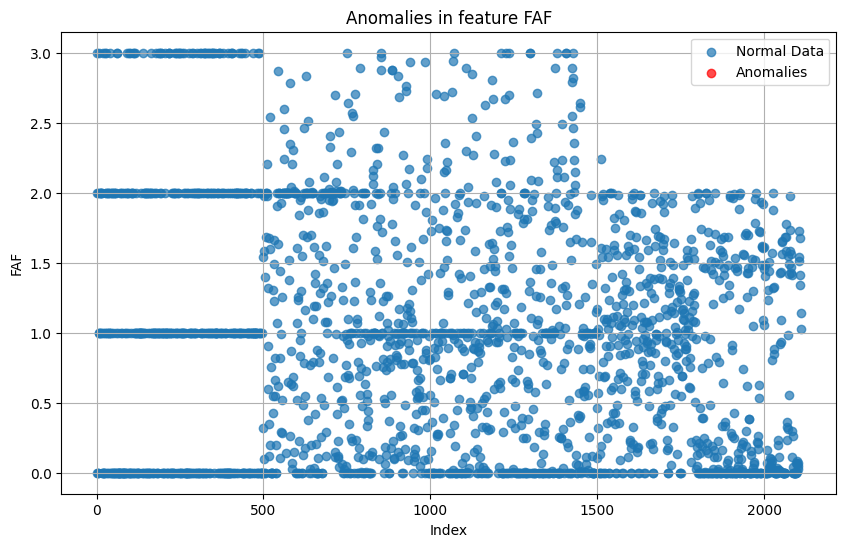

Feature TUE:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



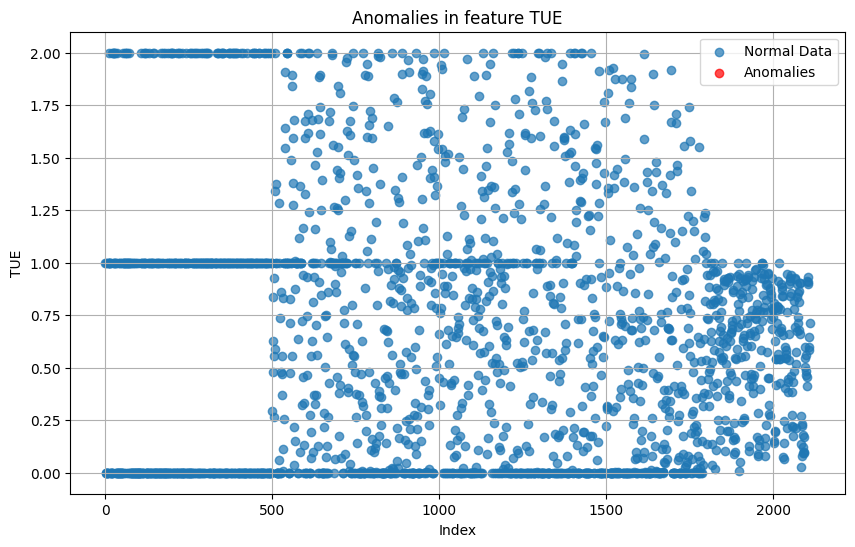

In [14]:
# Anomaly Detection using statistical approach
anomaly_sample = {}

for column in df_numerics.columns:
    mean_val = df_numerics[column].mean()
    std_val = df_numerics[column].std()
    
    # Define the boundaries between anomalies and normal values
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    
    # Find anomalies for this column
    normal_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    anomalies = df_numerics[(df_numerics[column] < lower_bound) | (df_numerics[column] > upper_bound)]
    anomaly_sample[column] = anomalies
    
    # Print counts
    print(f"Feature {column}:")
    print(f"Number of normal data points: {len(normal_data)}")
    print(f"Number of anomalies: {len(anomalies)}")
    print(f"Percentage of anomalies: {len(anomalies)/len(normal_data) * 100}% \n")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_data.index, normal_data[column], label='Normal Data', alpha=0.7)
    plt.scatter(anomalies.index, anomalies[column], color='red', label='Anomalies', alpha=0.7)
    plt.title(f"Anomalies in feature {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

### Categorical Data

In [15]:
df_object

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [16]:
# Anomaly detection using frequency-based detection
anomaly_sample = {}

for column in df_object.columns:
    feature_counts = df_object[column].value_counts()
    anomalies = feature_counts[feature_counts < 5]
    anomaly_sample[column] = anomalies

In [17]:
for feature, anomaly_data in anomaly_sample.items():
    print(f"Anomalies in {feature}:")
    print(anomaly_data, "\n")

Anomalies in Gender:
Series([], Name: count, dtype: int64) 

Anomalies in family_history_with_overweight:
Series([], Name: count, dtype: int64) 

Anomalies in FAVC:
Series([], Name: count, dtype: int64) 

Anomalies in CAEC:
Series([], Name: count, dtype: int64) 

Anomalies in SMOKE:
Series([], Name: count, dtype: int64) 

Anomalies in SCC:
Series([], Name: count, dtype: int64) 

Anomalies in CALC:
CALC
Always    1
Name: count, dtype: int64 

Anomalies in MTRANS:
Series([], Name: count, dtype: int64) 

Anomalies in NObeyesdad:
Series([], Name: count, dtype: int64) 



In [18]:
# Visualize this anomaly sample
anomaly_row = df[df['CALC'] == 'Always']
print(anomaly_row)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
26   Male  21.0     1.7    65.0                            yes  yes   2.0   

    NCP        CAEC SMOKE  CH2O SCC  FAF  TUE    CALC   MTRANS     NObeyesdad  
26  1.0  Frequently    no   2.0  no  1.0  2.0  Always  Walking  Normal_Weight  


In [19]:
anomaly_sample

{'Gender': Series([], Name: count, dtype: int64),
 'family_history_with_overweight': Series([], Name: count, dtype: int64),
 'FAVC': Series([], Name: count, dtype: int64),
 'CAEC': Series([], Name: count, dtype: int64),
 'SMOKE': Series([], Name: count, dtype: int64),
 'SCC': Series([], Name: count, dtype: int64),
 'CALC': CALC
 Always    1
 Name: count, dtype: int64,
 'MTRANS': Series([], Name: count, dtype: int64),
 'NObeyesdad': Series([], Name: count, dtype: int64)}

### LocalOutlierFactor

In [20]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
LOF_df = normalized_df.copy()
LOF_df = LOF_df.iloc[:,:31]
LOF_df['NObeyesdad'] = df.iloc[:,-1]
LOF_df['outlier'] = clf.fit_predict(df_numerics)
LOF_df = LOF_df[LOF_df['outlier']==1]
LOF_df = LOF_df.iloc[:,:-1]

In [21]:
LOF_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Normal_Weight
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Overweight_Level_I
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.155021,0.522491,0.689073,1.0,0.666667,0.398134,0.576111,0.448962,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Obesity_Type_III


## 3. Modeling

## 3.1 Logistic regression

In [22]:
logistic_df = normalized_df.iloc[:,:31]
logistic_df['NObeyesdad'] = df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 0

### Split training and testing data set

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

### Apply logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict(C = [0.001, 0.01, 0.1, 1],penalty = ['l1', 'l2']
                  ,solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [25]:
clf = LogisticRegression(C = 1,penalty = 'l1', solver = 'liblinear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

### Evaluate the model on test set

In [26]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9810725552050473
F1 score: 0.987152034261242
Recall: 0.9913978494623656
Precision: 0.9829424307036247

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       169
           1       0.98      0.99      0.99       465

    accuracy                           0.98       634
   macro avg       0.98      0.97      0.98       634
weighted avg       0.98      0.98      0.98       634


 confussion matrix:
 [[161   8]
 [  4 461]]


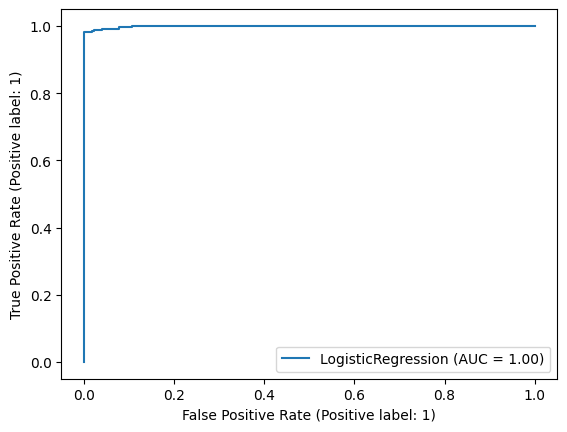

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)

### Check the importance of each feature in predicting obesity based on their weight in the model

In [28]:
pd.DataFrame({'1':clf.coef_[0]},index = logistic_df.columns[:-1]).sort_values(by = ['1'],key = abs,ascending=False)

,1
Weight,50.121249
Height,-14.674005
CAEC_Always,-1.577220
CAEC_Frequently,-1.447842
SCC_no,-1.164361
MTRANS_Walking,-0.971592
FCVC,-0.707793
CALC_no,-0.658245
family_history_with_overweight_no,-0.606720
Gender_Male,-0.554454


### Make prediction again without the most important features (Weight & Height)

In [38]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict(C = [0.001, 0.01, 0.1, 1],penalty = ['l1', 'l2']
                  ,solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [39]:
clf = LogisticRegression(C = 1,penalty = 'l1', solver = 'liblinear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.889589905362776
F1 score: 0.9250535331905783
Recall: 0.9290322580645162
Precision: 0.9211087420042644

 clasification report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       169
           1       0.92      0.93      0.93       465

    accuracy                           0.89       634
   macro avg       0.86      0.86      0.86       634
weighted avg       0.89      0.89      0.89       634


 confussion matrix:
 [[132  37]
 [ 33 432]]


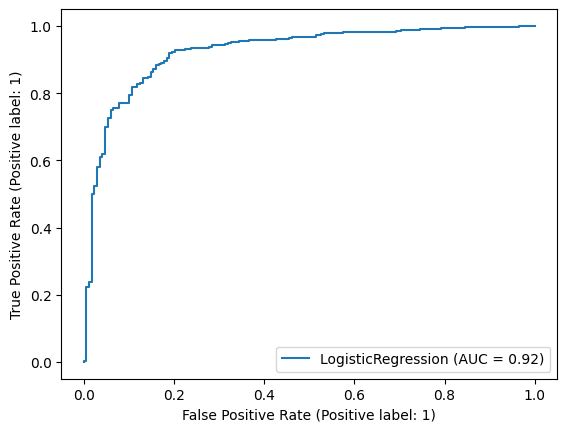

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)

### Multi-class Classification

In [65]:
#Using "One Over Rest" mode
logistic_df = normalized_df.iloc[:,:31]
logistic_df['NObeyesdad'] = df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    logistic_df.loc[logistic_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,3:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
clf = LogisticRegression(multi_class='multinomial')
param_grid = dict(C = [0.001, 0.01, 0.1, 1],penalty = ['l1', 'l2']
                  ,solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [67]:
clf = LogisticRegression(multi_class='multinomial', C = 1, penalty = 'l2', solver = 'newton-cg')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.5615141955835962
F1 score: 0.5322227467282237
Recall: 0.5541356489255885
Precision: 0.5530934865170931

 clasification report:
               precision    recall  f1-score   support

           1       0.48      0.28      0.35        89
           2       0.51      0.21      0.30        85
           3       0.45      0.60      0.51       114
           4       0.54      0.86      0.66        85
           5       0.83      0.99      0.91        92
           6       0.49      0.38      0.43        77
           7       0.56      0.57      0.56        92

    accuracy                           0.56       634
   macro avg       0.55      0.55      0.53       634
weighted avg       0.55      0.56      0.54       634


 confussion matrix:
 [[25  6 14 16  8 11  9]
 [ 4 18 40 15  2  3  3]
 [ 7  5 68 19  5  7  3]
 [ 0  0 12 73  0  0  0]
 [ 0  1  0  0 91  0  0]
 [ 7  5  5  2  3 29 26]
 [ 9  0 12 10  0  9 52]]


### Use dataframe after cleaning the outliers to make the binary classification again

In [50]:
# We clean the outliers using LOF outlier detection method
logistic_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 0
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict(C = [0.001, 0.01, 0.1, 1],penalty = ['l1', 'l2']
                  ,solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [51]:
clf = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9817880794701986
F1 score: 0.987736900780379
Recall: 0.9977477477477478
Precision: 0.977924944812362

 clasification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.96       160
           1       0.98      1.00      0.99       444

    accuracy                           0.98       604
   macro avg       0.99      0.97      0.98       604
weighted avg       0.98      0.98      0.98       604


 confussion matrix:
 [[150  10]
 [  1 443]]


### Use dataframe after cleaning the outliers to make the muti-class classification again

In [56]:
#Logistic regression with multi-class classification
logistic_df = normalized_df.iloc[:,:31]
logistic_df['NObeyesdad'] = df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    logistic_df.loc[logistic_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
clf = LogisticRegression(multi_class='multinomial')
param_grid = dict(C = [0.001, 0.01, 0.1, 1],penalty = ['l1', 'l2']
                  ,solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'saga'}

In [57]:
clf = LogisticRegression(multi_class='multinomial', C = 1, penalty = 'l1',solver = 'saga')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8359621451104101
F1 score: 0.8285673836145673
Recall: 0.832321315499317
Precision: 0.830271613413605

 clasification report:
               precision    recall  f1-score   support

           1       0.76      0.64      0.70        89
           2       0.71      0.73      0.72        85
           3       0.82      0.82      0.82       114
           4       0.88      1.00      0.93        85
           5       0.97      0.99      0.98        92
           6       0.80      0.66      0.72        77
           7       0.88      0.99      0.93        92

    accuracy                           0.84       634
   macro avg       0.83      0.83      0.83       634
weighted avg       0.83      0.84      0.83       634


 confussion matrix:
 [[57 17  4  0  0 11  0]
 [ 7 62 15  0  0  1  0]
 [ 1  5 93 12  3  0  0]
 [ 0  0  0 85  0  0  0]
 [ 0  0  1  0 91  0  0]
 [10  3  0  0  0 51 13]
 [ 0  0  0  0  0  1 91]]


## 3.2 KNN

Ordinal Encoding for obesity type

1:'Overweight_Level_I',

2:'Overweight_Level_II',

3:'Obesity_Type_I',

4:'Obesity_Type_II',

5:'Obesity_Type_III'

6:'Normal_Weight'

7:'Insufficient_Weight'

In [58]:
knn_df = normalized_df.iloc[:,:31]
knn_df['NObeyesdad'] = df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

### Split training and testing data set

In [59]:
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

### Apply knn

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1,11),metric=['euclidean', 'manhattan', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [61]:
clf = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)

Model evaluation

In [62]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8422712933753943
F1 score: 0.8351673357158056
Recall: 0.837082914638801
Precision: 0.8353215016302183

 clasification report:
               precision    recall  f1-score   support

           1       0.81      0.72      0.76        89
           2       0.76      0.82      0.79        85
           3       0.87      0.85      0.86       114
           4       0.95      0.99      0.97        85
           5       0.98      0.99      0.98        92
           6       0.66      0.60      0.63        77
           7       0.82      0.89      0.85        92

    accuracy                           0.84       634
   macro avg       0.84      0.84      0.84       634
weighted avg       0.84      0.84      0.84       634


 confussion matrix:
 [[64  6  4  0  0 12  3]
 [ 6 70  5  1  1  2  0]
 [ 2  6 97  1  1  3  4]
 [ 0  1  0 84  0  0  0]
 [ 0  1  0  0 91  0  0]
 [ 7  8  4  1  0 46 11]
 [ 0  0  2  1  0  7 82]]


### Redo with classified to obesity and nonobesity (Binary classification)

In [63]:
knn_df = normalized_df.iloc[:,:31]
knn_df['NObeyesdad'] = df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier

grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [64]:
clf = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'micro'))
print('Recall:', recall_score(y_test, y_pred,average = 'micro'))
print('Precision:', precision_score(y_test, y_pred,average = 'micro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9258675078864353
F1 score: 0.9258675078864353
Recall: 0.9258675078864353
Precision: 0.9258675078864353

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       169
           1       0.95      0.95      0.95       465

    accuracy                           0.93       634
   macro avg       0.90      0.91      0.91       634
weighted avg       0.93      0.93      0.93       634


 confussion matrix:
 [[146  23]
 [ 24 441]]


### Use dataframe after cleaning the outliers to make the muti-class classification again

In [68]:
# We clean the outliers using LOF outlier detection method
knn_df = LOF_df.copy()
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1,11),metric=['euclidean', 'manhattan', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [69]:
clf = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.847682119205298
F1 score: 0.8367975599053713
Recall: 0.8397745481750615
Precision: 0.8368319658622896

 clasification report:
               precision    recall  f1-score   support

           1       0.79      0.75      0.77        76
           2       0.77      0.86      0.81        77
           3       0.83      0.86      0.85       100
           4       0.95      0.96      0.95        93
           5       0.99      1.00      0.99        98
           6       0.68      0.56      0.61        81
           7       0.85      0.90      0.87        79

    accuracy                           0.85       604
   macro avg       0.84      0.84      0.84       604
weighted avg       0.84      0.85      0.84       604


 confussion matrix:
 [[57  5  4  0  0  9  1]
 [ 6 66  2  0  1  2  0]
 [ 1  5 86  3  0  4  1]
 [ 0  0  4 89  0  0  0]
 [ 0  0  0  0 98  0  0]
 [ 8 10  5  2  0 45 11]
 [ 0  0  2  0  0  6 71]]


### Use dataframe after cleaning the outliers to make the binary classification again

In [70]:
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
param_grid = dict(n_neighbors=range(1,11),metric=['euclidean', 'manhattan', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [71]:
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9271523178807947
F1 score: 0.9045333716502622
Recall: 0.8964808558558559
Precision: 0.91359765051395

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       160
           1       0.94      0.96      0.95       444

    accuracy                           0.93       604
   macro avg       0.91      0.90      0.90       604
weighted avg       0.93      0.93      0.93       604


 confussion matrix:
 [[133  27]
 [ 17 427]]


### Make prediction again without the most important features (Weight & Height)

In [72]:
#drop weight, height
knn_df = LOF_df.copy()
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1,11),metric=['euclidean', 'manhattan', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 1}

In [73]:
clf = KNeighborsClassifier(n_neighbors = 1, metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.793046357615894
F1 score: 0.7821561820354768
Recall: 0.7838540335642319
Precision: 0.7825580893639801

 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.64      0.69        76
           2       0.74      0.71      0.73        77
           3       0.77      0.76      0.76       100
           4       0.83      0.91      0.87        93
           5       0.97      1.00      0.98        98
           6       0.60      0.57      0.58        81
           7       0.82      0.89      0.85        79

    accuracy                           0.79       604
   macro avg       0.78      0.78      0.78       604
weighted avg       0.79      0.79      0.79       604


 confussion matrix:
 [[49  3  6  4  1 11  2]
 [ 6 55  4  6  1  5  0]
 [ 3  6 76  4  1  7  3]
 [ 0  1  5 85  0  1  1]
 [ 0  0  0  0 98  0  0]
 [ 8  9  6  3  0 46  9]
 [ 0  0  2  0  0  7 70]]


### Use dataframe after cleaning the outliers and dropping the most important features (Weight & Height) to make the binary classification again

In [74]:
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:, :-1].drop(columns=['Height', 'Weight'])
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
param_grid = dict(n_neighbors=range(1,11),metric=['euclidean', 'manhattan', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [75]:
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan')
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9221854304635762
F1 score: 0.8982388597934523
Recall: 0.8911036036036035
Precision: 0.9061810154525387

 clasification report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       160
           1       0.94      0.96      0.95       444

    accuracy                           0.92       604
   macro avg       0.91      0.89      0.90       604
weighted avg       0.92      0.92      0.92       604


 confussion matrix:
 [[132  28]
 [ 19 425]]


### 3.3 Random Forest

### Binary Classification

In [77]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

clf = RandomForestClassifier()
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [78]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 100,min_samples_leaf = 2, min_samples_split = 2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9735099337748344
F1 score: 0.9658540032506537
Recall: 0.9639921171171171
Precision: 0.9677584151671681

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       160
           1       0.98      0.98      0.98       444

    accuracy                           0.97       604
   macro avg       0.97      0.96      0.97       604
weighted avg       0.97      0.97      0.97       604


 confussion matrix:
 [[151   9]
 [  7 437]]


### Multi-class classification

In [79]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
knn_df = LOF_df.copy()
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

clf = RandomForestClassifier()
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [80]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 100,min_samples_leaf = 1, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9403973509933775
F1 score: 0.9363850876881348
Recall: 0.936471226459826
Precision: 0.9374619343166319

 clasification report:
               precision    recall  f1-score   support

           1       0.93      0.84      0.88        76
           2       0.90      0.94      0.92        77
           3       0.99      0.95      0.97       100
           4       1.00      0.99      0.99        93
           5       0.99      1.00      0.99        98
           6       0.80      0.86      0.83        81
           7       0.95      0.97      0.96        79

    accuracy                           0.94       604
   macro avg       0.94      0.94      0.94       604
weighted avg       0.94      0.94      0.94       604


 confussion matrix:
 [[64  4  1  0  0  7  0]
 [ 0 72  0  0  0  5  0]
 [ 2  0 95  0  0  3  0]
 [ 0  0  0 92  1  0  0]
 [ 0  0  0  0 98  0  0]
 [ 3  4  0  0  0 70  4]
 [ 0  0  0  0  0  2 77]]


### Make binary classification again without the most important features (Weight & Height)

In [81]:
#drop 2 features
from sklearn.ensemble import RandomForestClassifier
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:, :-1].drop(columns = ['Height', 'Weight'])
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:, :-1].drop(columns = ['Height', 'Weight'])
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

clf = RandomForestClassifier()
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [82]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 100,min_samples_leaf = 1, min_samples_split = 2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9205298013245033
F1 score: 0.8987766046589576
Recall: 0.9019707207207208
Precision: 0.8957317073170732

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       160
           1       0.95      0.94      0.95       444

    accuracy                           0.92       604
   macro avg       0.90      0.90      0.90       604
weighted avg       0.92      0.92      0.92       604


 confussion matrix:
 [[138  22]
 [ 26 418]]


### Make multi-class classification again without the most important features (Weight & Height)

In [84]:
from sklearn.ensemble import RandomForestClassifier
knn_df = LOF_df.copy()
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:, :-1].drop(columns = ['Height', 'Weight'])
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:, :-1].drop(columns = ['Height', 'Weight'])
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

clf = RandomForestClassifier()
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [85]:
clf = RandomForestClassifier(max_depth = None, n_estimators = 500,min_samples_leaf = 1, min_samples_split = 2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.859271523178808
F1 score: 0.85445191518382
Recall: 0.8527466808934566
Precision: 0.8575478538503148

 clasification report:
               precision    recall  f1-score   support

           1       0.85      0.76      0.81        76
           2       0.81      0.77      0.79        77
           3       0.83      0.85      0.84       100
           4       0.91      0.92      0.92        93
           5       0.99      1.00      0.99        98
           6       0.66      0.73      0.69        81
           7       0.95      0.94      0.94        79

    accuracy                           0.86       604
   macro avg       0.86      0.85      0.85       604
weighted avg       0.86      0.86      0.86       604


 confussion matrix:
 [[58  1  5  1  0 11  0]
 [ 1 59  6  5  0  6  0]
 [ 4  3 85  1  1  6  0]
 [ 0  3  1 86  0  3  0]
 [ 0  0  0  0 98  0  0]
 [ 5  7  5  1  0 59  4]
 [ 0  0  1  0  0  4 74]]


### Make binary classification again solely based on the eating habits

In [105]:
LOF_df_column_names = list(LOF_df.columns)
print(LOF_df_column_names)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad']


In [107]:
# Preprocess the dataframe
RFT_df = LOF_df[['FAVC_no', 'FAVC_yes', 'FCVC', 'NCP', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CH2O', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']]
RFT_df['NObeyesdad'] = LOF_df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 0

In [108]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [109]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [110]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 200,min_samples_leaf = 1, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8642384105960265
F1 score: 0.9076576576576577
Recall: 0.9076576576576577
Precision: 0.9076576576576577

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74       160
           1       0.91      0.91      0.91       444

    accuracy                           0.86       604
   macro avg       0.83      0.83      0.83       604
weighted avg       0.86      0.86      0.86       604


 confussion matrix:
 [[119  41]
 [ 41 403]]


### Make multi-class classification again solely based on the eating habits

In [117]:
# Preprocess the dataframe
RFT_df = LOF_df[['FAVC_no', 'FAVC_yes', 'FCVC', 'NCP', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CH2O', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no']]
RFT_df['NObeyesdad'] = LOF_df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    RFT_df.loc[RFT_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

In [118]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [119]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [120]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 100,min_samples_leaf = 2, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.6804635761589404
F1 score: 0.660555692383812
Recall: 0.6662670943865355
Precision: 0.6695171213824311

 clasification report:
               precision    recall  f1-score   support

           1       0.64      0.37      0.47        76
           2       0.45      0.42      0.43        77
           3       0.63      0.62      0.62       100
           4       0.72      0.78      0.75        93
           5       0.96      1.00      0.98        98
           6       0.56      0.74      0.63        81
           7       0.73      0.73      0.73        79

    accuracy                           0.68       604
   macro avg       0.67      0.67      0.66       604
weighted avg       0.68      0.68      0.67       604


 confussion matrix:
 [[28  7 12  8  0 16  5]
 [ 3 32 18  8  0 12  4]
 [ 5 11 62 10  3  7  2]
 [ 3  8  2 73  0  5  2]
 [ 0  0  0  0 98  0  0]
 [ 1  9  2  1  0 60  8]
 [ 4  4  3  1  1  8 58]]


### Make binary classification again solely based on the physical condition

In [121]:
LOF_df_column_names = list(LOF_df.columns)
print(LOF_df_column_names)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad']


In [122]:
# Preprocess the Dataframe
RFT_df = LOF_df[['SCC_no', 'SCC_yes', 'FAF', 'TUE', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']]
RFT_df['NObeyesdad'] = LOF_df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 0

In [123]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [124]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [125]:
clf = RandomForestClassifier(max_depth = 10, n_estimators = 500,min_samples_leaf = 1, min_samples_split = 10)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8178807947019867
F1 score: 0.8806941431670282
Recall: 0.9144144144144144
Precision: 0.8493723849372385

 clasification report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       160
           1       0.85      0.91      0.88       444

    accuracy                           0.82       604
   macro avg       0.77      0.73      0.75       604
weighted avg       0.81      0.82      0.81       604


 confussion matrix:
 [[ 88  72]
 [ 38 406]]


### Make multi-class classification again solely based on the physical conditions

In [126]:
# Preprocess the Dataframe
RFT_df = LOF_df[['SCC_no', 'SCC_yes', 'FAF', 'TUE', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking']]
RFT_df['NObeyesdad'] = LOF_df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    RFT_df.loc[RFT_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

In [127]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [128]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 200}

In [129]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 100,min_samples_leaf = 2, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.49503311258278143
F1 score: 0.46774144342139073
Recall: 0.4836934853541615
Precision: 0.46967609813273276

 clasification report:
               precision    recall  f1-score   support

           1       0.44      0.32      0.37        76
           2       0.25      0.18      0.21        77
           3       0.39      0.38      0.39       100
           4       0.56      0.52      0.54        93
           5       0.64      0.85      0.73        98
           6       0.52      0.77      0.62        81
           7       0.49      0.38      0.43        79

    accuracy                           0.50       604
   macro avg       0.47      0.48      0.47       604
weighted avg       0.48      0.50      0.48       604


 confussion matrix:
 [[24  6 10 18  4 11  3]
 [ 4 14 21  9 12 10  7]
 [11 12 38  4 11 15  9]
 [ 4 13 12 48  9  3  4]
 [ 0  2  1  4 83  1  7]
 [ 9  4  5  0  0 62  1]
 [ 3  4 10  3 11 18 30]]


### 4. PCA

In [86]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(LOF_df.iloc[:,:-1])
pca_list = pca.explained_variance_ratio_
pca_list = np.sort(pca_list)[::-1]
cumulate_list = []
for i in range(len(pca_list)):
    cumulate_list.append(sum(pca_list[:i+1]))
cumulate_list
#12PC included 90% data

[0.2092415885131841,
 0.37158361275758045,
 0.5050121828221543,
 0.6234512429411423,
 0.6887489352153815,
 0.7461182708562673,
 0.7844660862818889,
 0.8176351661631317,
 0.846623975179058,
 0.8741182061584352,
 0.8954987565050769,
 0.9163115513360751,
 0.9333873941045603,
 0.9478682766729214,
 0.9612309216789351,
 0.9736095935210054,
 0.9817278934867132,
 0.989385145399603,
 0.9934226256745466,
 0.9960887570414405,
 0.9983417347707653,
 0.9997674158297108,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [102]:
pca = PCA(n_components=12)
pca.fit(LOF_df.iloc[:,:-1])
pca_df = pd.DataFrame(pca.transform(LOF_df.iloc[:,:-1]),
                      columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'],
                         index = LOF_df.iloc[:,:-1].index)
pca_df['NObeyesdad'] = LOF_df['NObeyesdad']

In [103]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,NObeyesdad
0,0.718496,0.991003,-0.445798,-0.423355,1.028903,-0.331062,-0.371232,0.246084,-0.125179,-0.284029,0.198707,-0.299375,Normal_Weight
1,0.890330,-0.188358,0.106929,0.071706,1.628798,-0.114107,0.710391,-0.207825,1.024193,0.404792,0.144820,0.252448,Normal_Weight
2,-0.548466,0.483278,0.451214,-0.411056,1.208940,-0.188385,-0.031003,0.360534,-0.092669,-0.085114,-0.018683,0.217095,Normal_Weight
3,-0.325803,0.830073,1.141759,0.754686,0.878313,-0.773872,0.211537,-0.107875,-0.332604,0.163632,-0.479624,0.093028,Overweight_Level_I
4,-0.019347,-0.011795,1.470648,0.211241,0.727958,-0.870064,-0.589020,-0.317891,-0.071458,-0.439348,-0.216259,0.005847,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,0.581137,-0.650855,-0.419165,-0.240143,0.063008,0.000984,0.201758,0.089077,-0.147368,0.328516,-0.096508,0.155164,Obesity_Type_III
2106,0.589239,-0.648720,-0.420600,-0.237813,0.055644,-0.001371,0.167273,0.101459,-0.138577,0.335972,-0.100992,0.152246,Obesity_Type_III
2107,0.574357,-0.675829,-0.430890,-0.224510,0.077922,0.013165,0.177602,-0.071669,-0.141773,0.255449,-0.079206,0.043088,Obesity_Type_III
2108,0.569800,-0.674926,-0.430160,-0.228890,0.082297,0.013154,0.212063,-0.058286,-0.148463,0.247699,-0.081164,0.052358,Obesity_Type_III


### Using PCA to perform random forest algorithm (binary classification)

In [90]:
# Preprocess the dataframe
RFT_df = pca_df.iloc[:,:-1]
RFT_df['NObeyesdad'] = pca_df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    RFT_df.loc[RFT_df['NObeyesdad'] == a,'NObeyesdad'] = 0

In [91]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [92]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [93]:
clf = RandomForestClassifier(max_depth = 30, n_estimators = 200,min_samples_leaf = 1, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9089403973509934
F1 score: 0.9384098544232924
Recall: 0.9436936936936937
Precision: 0.933184855233853

 clasification report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       160
           1       0.93      0.94      0.94       444

    accuracy                           0.91       604
   macro avg       0.89      0.88      0.88       604
weighted avg       0.91      0.91      0.91       604


 confussion matrix:
 [[130  30]
 [ 25 419]]


### Using PCA to perform random forest algorithm (multi-class classification)

In [97]:
# Preprocess the dataframe
RFT_df = pca_df.iloc[:,:-1]
RFT_df['NObeyesdad'] = pca_df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    RFT_df.loc[RFT_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

In [98]:
# Split the training set and test set
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(RFT_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

In [99]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
param_grid = dict(n_estimators=[100,200,500],max_depth = [10,20,30,None]
                 ,min_samples_split = [2,5,10],min_samples_leaf = [1,2,4])
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 500}

In [100]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 500,min_samples_leaf = 1, min_samples_split = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.7947019867549668
F1 score: 0.7854501125083121
Recall: 0.7851216063492262
Precision: 0.7871274218981393

 clasification report:
               precision    recall  f1-score   support

           1       0.72      0.63      0.67        76
           2       0.72      0.69      0.70        77
           3       0.76      0.77      0.77       100
           4       0.84      0.90      0.87        93
           5       0.98      1.00      0.99        98
           6       0.61      0.64      0.63        81
           7       0.88      0.86      0.87        79

    accuracy                           0.79       604
   macro avg       0.79      0.79      0.79       604
weighted avg       0.79      0.79      0.79       604


 confussion matrix:
 [[48  2  8  3  0 11  4]
 [ 5 53  5  7  1  6  0]
 [ 3  9 77  4  1  6  0]
 [ 1  3  4 84  0  1  0]
 [ 0  0  0  0 98  0  0]
 [10  7  5  2  0 52  5]
 [ 0  0  2  0  0  9 68]]


### Cross validation

Logistic Regression Cross Validation Score:  96.6%
KNN Cross Validation Score:  89.04%
Random Forest Cross Validation Score:  95.62%


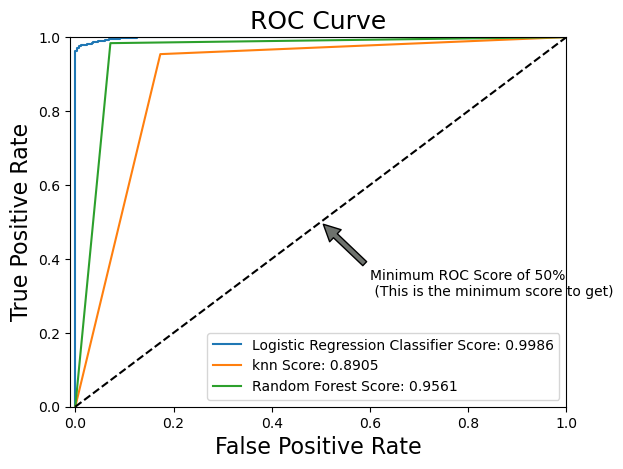

In [519]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#binary classification
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
log = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
knn = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan')
rf = RandomForestClassifier(max_depth = 30, n_estimators = 100,min_samples_leaf = 2, min_samples_split = 2)
log_reg_score = cross_val_score(log, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
knn_reg_score = cross_val_score(knn, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('KNN Cross Validation Score: ', round(knn_reg_score.mean() * 100, 2).astype(str) + '%')
rf_reg_score = cross_val_score(rf, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Random Forest Cross Validation Score: ', round(rf_reg_score.mean() * 100, 2).astype(str) + '%')
bin_cv_score = [log_reg_score.mean(),knn_reg_score.mean(),rf_reg_score.mean()]

log_predict = cross_val_predict(log, x_train, y_train, cv=5,method="decision_function")
knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
rf_predict = cross_val_predict(rf, x_train, y_train, cv=5)
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_predict)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_train, knn_predict)
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_train, rf_predict)

plt.title('ROC Curve', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_predict)))
plt.plot(knn_fpr, knn_tpr, label='knn Score: {:.4f}'.format(roc_auc_score(y_train, knn_predict)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_train, rf_predict)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()

In [520]:
#multiclass classification
knn_df = LOF_df.copy()
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
log = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga')
knn = KNeighborsClassifier(n_neighbors = 1,metric = 'manhattan')
rf = RandomForestClassifier(max_depth = None, n_estimators = 200,min_samples_leaf = 1, min_samples_split = 2)
log_reg_score = cross_val_score(log, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
knn_reg_score = cross_val_score(knn, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('KNN Cross Validation Score: ', round(knn_reg_score.mean() * 100, 2).astype(str) + '%')
rf_reg_score = cross_val_score(rf, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Random Forest Cross Validation Score: ', round(rf_reg_score.mean() * 100, 2).astype(str) + '%')
mul_cv_score = [log_reg_score.mean(),knn_reg_score.mean(),rf_reg_score.mean()]

Logistic Regression Cross Validation Score:  84.42%
KNN Cross Validation Score:  83.26%
Random Forest Cross Validation Score:  94.24%


Logistic Regression Cross Validation Score:  77.3%
KNN Cross Validation Score:  85.95%
Random Forest Cross Validation Score:  86.18%


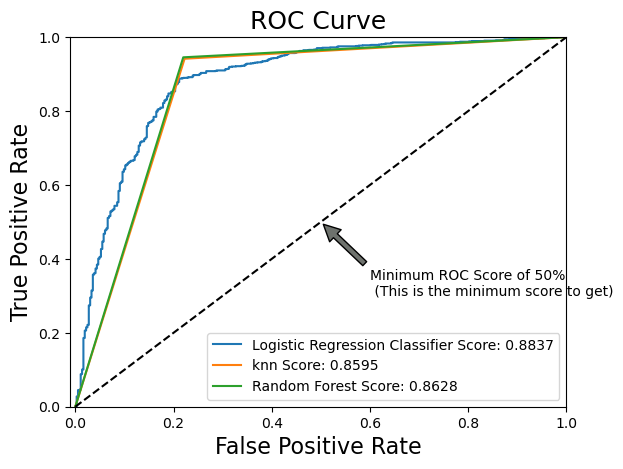

In [518]:
#drop weight,age,height binary
from sklearn.metrics import balanced_accuracy_score
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,3:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
log = LogisticRegression(C = 1,penalty = 'l2', solver = 'lbfgs')
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'manhattan')
RandomForestClassifier(max_depth = 20, n_estimators = 500,min_samples_leaf = 1, min_samples_split = 2)
log_reg_score = cross_val_score(log, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
knn_reg_score = cross_val_score(knn, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('KNN Cross Validation Score: ', round(knn_reg_score.mean() * 100, 2).astype(str) + '%')
rf_reg_score = cross_val_score(rf, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Random Forest Cross Validation Score: ', round(rf_reg_score.mean() * 100, 2).astype(str) + '%')
bin_drop_cv_score = [log_reg_score.mean(),knn_reg_score.mean(),rf_reg_score.mean()]

log_predict = cross_val_predict(log, x_train, y_train, cv=5,method="decision_function")
knn_predict = cross_val_predict(knn, x_train, y_train, cv=5)
rf_predict = cross_val_predict(rf, x_train, y_train, cv=5)
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_predict)
knn_fpr, knn_tpr, knn_thresold = roc_curve(y_train, knn_predict)
rf_fpr, rf_tpr, rf_thresold = roc_curve(y_train, rf_predict)

plt.title('ROC Curve', fontsize=18)
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_predict)))
plt.plot(knn_fpr, knn_tpr, label='knn Score: {:.4f}'.format(roc_auc_score(y_train, knn_predict)))
plt.plot(rf_fpr, rf_tpr, label='Random Forest Score: {:.4f}'.format(roc_auc_score(y_train, rf_predict)))

plt.plot([0, 1], [0, 1], 'k--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
plt.legend()

In [525]:
#drop weight,age,height multiclass
knn_df = normalized_df.iloc[:,:31]
knn_df['NObeyesdad'] = df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,3:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
log = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear')
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'manhattan')
rf = RandomForestClassifier(max_depth = 30, n_estimators = 100,min_samples_leaf = 1, min_samples_split = 2)
log_reg_score = cross_val_score(log, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')
knn_reg_score = cross_val_score(knn, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('KNN Cross Validation Score: ', round(knn_reg_score.mean() * 100, 2).astype(str) + '%')
rf_reg_score = cross_val_score(rf, x_train, y_train, cv=5,scoring = 'balanced_accuracy')
print('Random Forest Cross Validation Score: ', round(rf_reg_score.mean() * 100, 2).astype(str) + '%')
mul_drop_cv_score = [log_reg_score.mean(),knn_reg_score.mean(),rf_reg_score.mean()]

Logistic Regression Cross Validation Score:  55.46%
KNN Cross Validation Score:  71.09%
Random Forest Cross Validation Score:  78.12%


In [526]:
#conclusion table of cross validation
pd.DataFrame(data={'Binary Classification': bin_cv_score,'Multiclass Classification': mul_cv_score,
                  'Binary Classification with drop features':bin_drop_cv_score,
                  'Multiclass Classification with drop featues': mul_drop_cv_score}, 
             index=['Logistic Regression','K-Nearest Neighbors','Random Forest'])

,Binary Classification,Multiclass Classification,Binary Classification with drop features,Multiclass Classification with drop featues
Logistic Regression,0.965964,0.844227,0.773007,0.554551
K-Nearest Neighbors,0.890422,0.832634,0.859476,0.710905
Random Forest,0.956242,0.942442,0.861780,0.781177
